In [1]:
#--------Import packages
#--------For Netcdf manipulation
import statsmodels.tsa.stattools
import xarray as xr
from netCDF4 import Dataset
import netCDF4 as nc

#--------For array manipulation
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import Grouper

#--------For plotting
# import cartopy.crs as ccrs
# import cartopy.feature as cfeature
# import matplotlib.pylab as plt
from mpl_toolkits.basemap import Basemap # plots maps
from matplotlib.cbook import dedent
#import cmocean
import seaborn as sns

In [2]:
#-----Read in volume dataset as dataframe
vol_df = pd.read_csv('/Users/fridaperez/Developer/repos/local_repo/CCF/vol_mean_ea.csv')
#-----Read in SAM as dataframe
sam_df = pd.read_csv('/Users/fridaperez/Developer/repos/local_repo/AtmosIndex/sam_long.csv',parse_dates=['Dates'])
#-----Read in dates  as dataframe
dates_df = pd.read_csv('/Users/fridaperez/Developer/repos/local_repo/CCF/dates_df.csv')

In [3]:
dates_df['Dates'] = dates_df['Dates'].astype('datetime64[ns]')
sam_df = sam_df.drop(["Years", "Months"], axis=1)

# Get dates  for only May -October
sam_df = sam_df[(sam_df.Dates.dt.month >= 5) & (sam_df.Dates.dt.month <= 10)]
# Here we set the index so that we can filter using iloc
sam_df = sam_df.set_index('Dates')
sam_df = sam_df.loc['2002-05-01':'2018-10-01']
## Removing the first 5 rows/dates
sam_df  = sam_df.iloc[5:]

In [4]:
# we now want the 'Dates' as a normal column and not an index
sam_df = sam_df.reset_index()
# Combining the SAM and SIV Dates
df_new = sam_df.copy()
df_new["SIV"] = vol_df["SIV"]

In [5]:
df_new

,Dates,SAM,SIV
0,2007-05-01,-1.02,484.391924
1,2008-05-01,-0.66,569.883316
2,2009-05-01,-0.14,578.503829
3,2010-05-01,1.51,655.359084
4,2011-05-01,1.37,651.830940
...,...,...,...
92,2014-10-01,1.32,678.145248
93,2015-10-01,-0.66,643.797937
94,2016-10-01,-0.89,846.980728
95,2017-10-01,-0.64,635.923255


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import rpy2.robjects as robjects
import statsmodels.api as sm
from statsmodels.formula.api import ols
dir = '/Users/fridaperez/Developer/repos/local_repo/pub_plots/EastAntarctica/'
from astsadata import *

def month_ccf_sam(df):
    x = [5,6,7,8,9,10]
    df_selmons = []
    df_vol_selmons = []
    df_sam_selmons = []
    cdfs = []
    df_list = []
    ind0 = 0
    for i in x:
        df_selmon = df[df['Dates'].dt.month.isin([i])]
        ccf_df = statsmodels.tsa.stattools.ccf(df_selmon.SAM, df_selmon.SIV, adjusted=False)
        ccf_df = pd.DataFrame(ccf_df, columns=['CCF'])
        df_selmons.append(df_selmon)
        print(ccf_df)
        cdfs.append(ccf_df)
        ## Separate the two columns
        # SIV #
        df_vol_selmon = df_selmon[['Dates', 'SIV']]
        df_vol_selmon['Dates'] = df_vol_selmon['Dates'].dt.to_period('M')
        df_vol_selmon = df_vol_selmon.set_index(['Dates'])
        df_vol_selmons.append(df_vol_selmon)
        # SAM #
        df_sam_selmon = df_selmon[['Dates', 'SAM']]
        df_sam_selmon['Dates'] = df_sam_selmon['Dates'].dt.to_period('M')
        df_sam_selmon = df_sam_selmon.set_index(['Dates'])
        df_sam_selmons.append(df_sam_selmon)
        #return cdfs
    # PLOT #
    for x in range(6):

        fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(13, 10))
        lag = 0
        for i in range(6):
            row =0 if i <= 2 else 1
            col = i if i <=2 else i-3
            lowess = sm.nonparametric.lowess(df_vol_selmons[x].iloc[:, 0], df_sam_selmons[x].iloc[:, 0].shift(lag))
            axes[row, col].scatter(df_sam_selmons[x].shift(lag), df_vol_selmons[x])
            axes[row, col].set_title(f"SAM (t-{lag})")
            axes[row, col].set_ylabel("SIV (t)")
            axes[row, col].plot(lowess[:, 0], lowess[:, 1], color="red")
            axes[row, col].text(s=round(cdfs[x].loc[i][0],3), x = .95, y = 0.05, transform = axes[row, col].transAxes, ha = 'right') #ha, horizontal line
            lag += 1
        fig.tight_layout()
        plt.savefig(dir + str(x))


/Users/fridaperez/miniconda3/envs/basemap_stable/lib/python3.8/site-packages/pandas/core/arrays/datetimes.py:1101: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


         CCF
0   0.063061
1   0.533273
2   0.118120
3  -0.073454
4  -0.525372
5  -0.035270
6  -0.004634
7   0.303455
8  -0.040525
9   0.076487
10 -0.187020
11  0.019435
         CCF
0   0.053850
1  -0.093526
2  -0.543308
3   0.121946
4   0.135174
5   0.260218
6  -0.041439
7  -0.131617
8  -0.336747
9  -0.043450
10  0.233165
11  0.089091
12  0.011350
13 -0.145514
14 -0.118627
15 -0.041514
16  0.115961
         CCF
0  -0.020524
1  -0.211359
2   0.225785
3  -0.138796
4   0.172966
5   0.099599
6  -0.050384
7  -0.117892
8   0.251360
9  -0.134212
10 -0.009536
11 -0.002337
12 -0.105630
13 -0.014346
14  0.036299
15  0.010592
16  0.000009
         CCF
0   0.001837
1  -0.013831
2   0.061483
3   0.178854
4  -0.117428
5  -0.052564
6   0.172089
7   0.080289
8   0.036995
9  -0.041947
10 -0.105935
11  0.032948
12 -0.023332
13  0.002459
14  0.045470
15  0.004746
16  0.016171
         CCF
0  -0.053307
1   0.143568
2   0.292828
3   0.052840
4  -0.329367
5  -0.307683
6  -0.234018
7  -0.183031
8   0.007990

/var/folders/f1/8zx2wbhx4vb8626x_99mwyx40000gn/T/ipykernel_85403/3160695369.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vol_selmon['Dates'] = df_vol_selmon['Dates'].dt.to_period('M')
/var/folders/f1/8zx2wbhx4vb8626x_99mwyx40000gn/T/ipykernel_85403/3160695369.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sam_selmon['Dates'] = df_sam_selmon['Dates'].dt.to_period('M')
/var/folders/f1/8zx2wbhx4vb8626x_99mwyx40000gn/T/ipykernel_85403/3160695369.py:28: SettingWithCopyWarning: 
A value is try

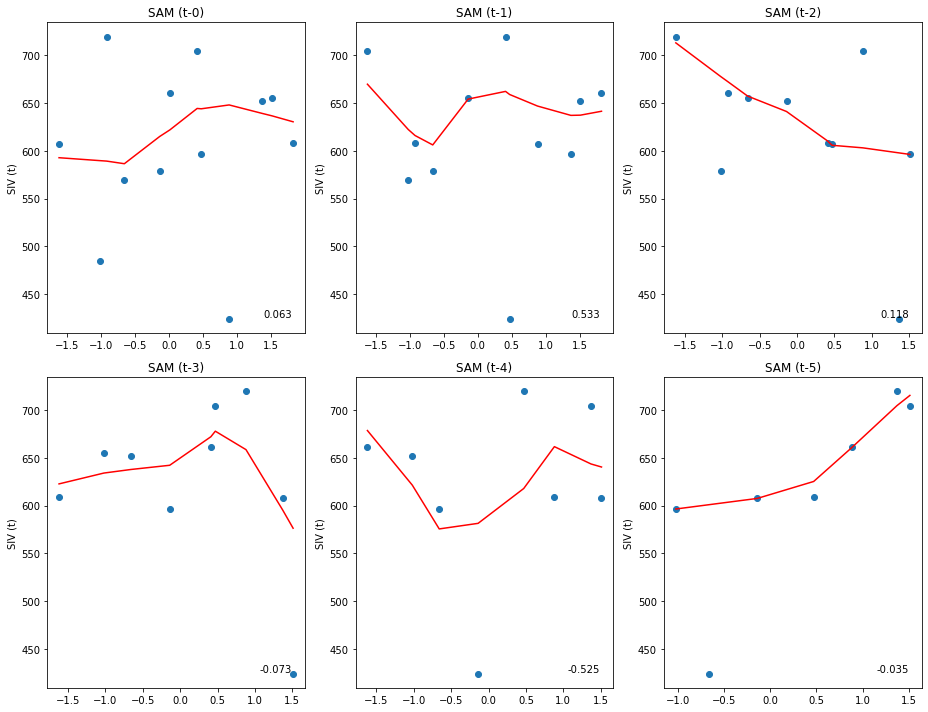

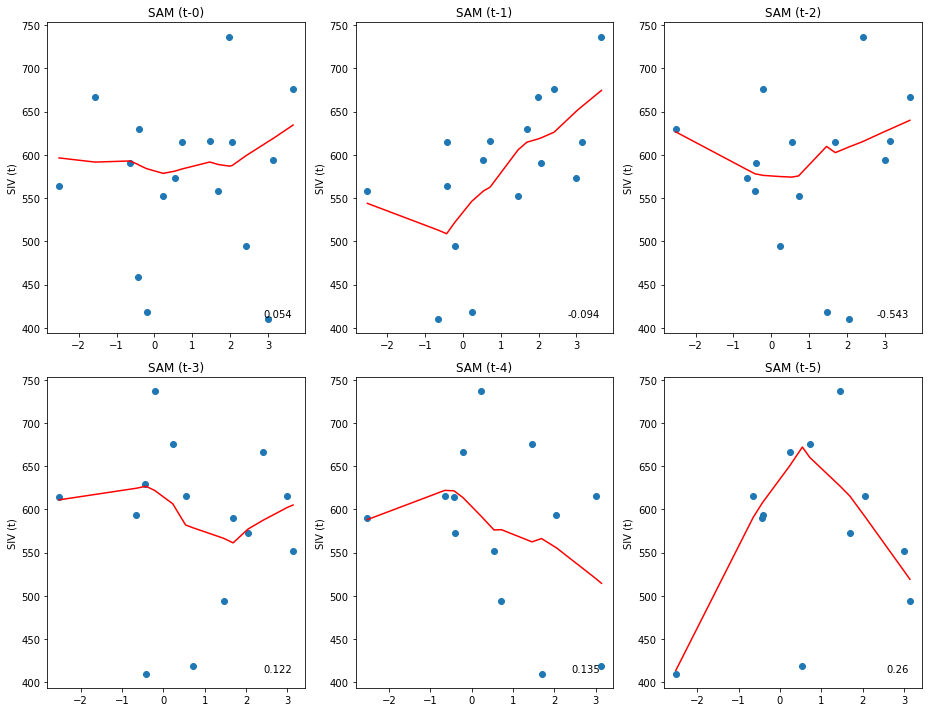

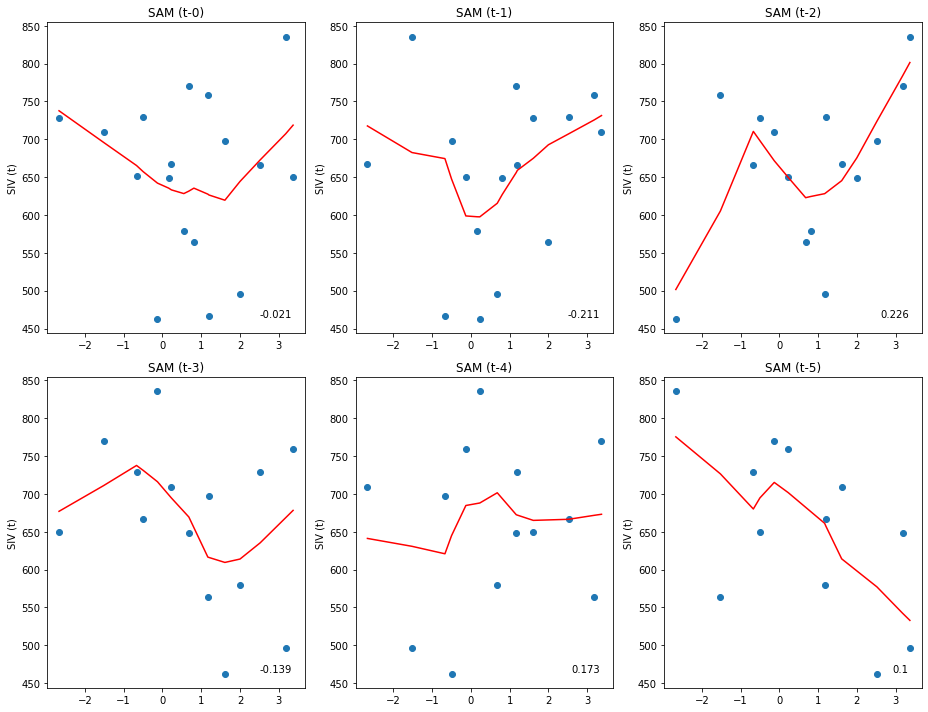

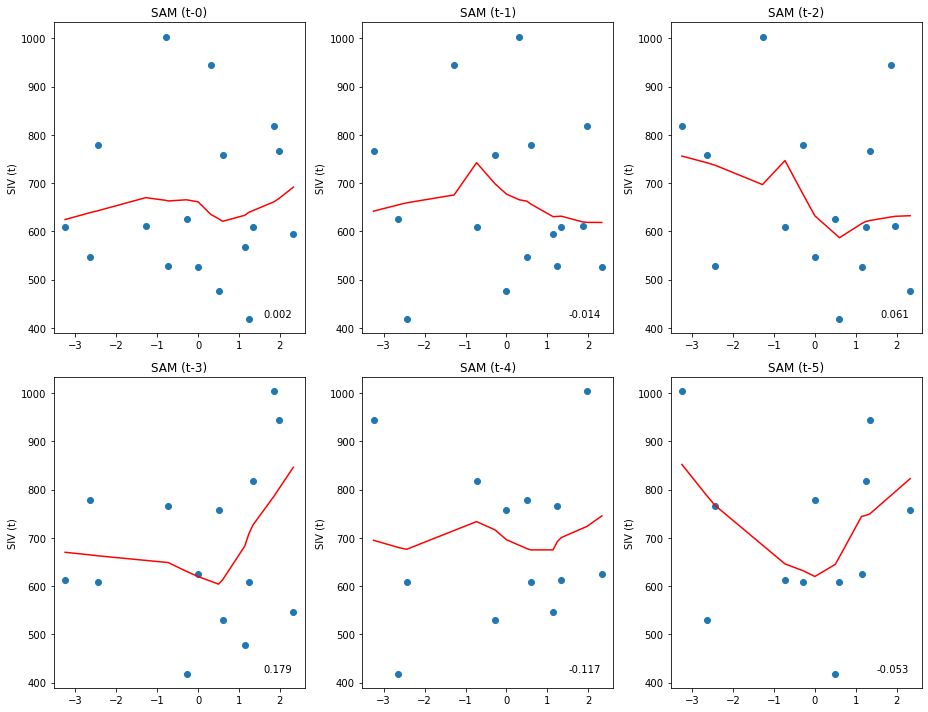

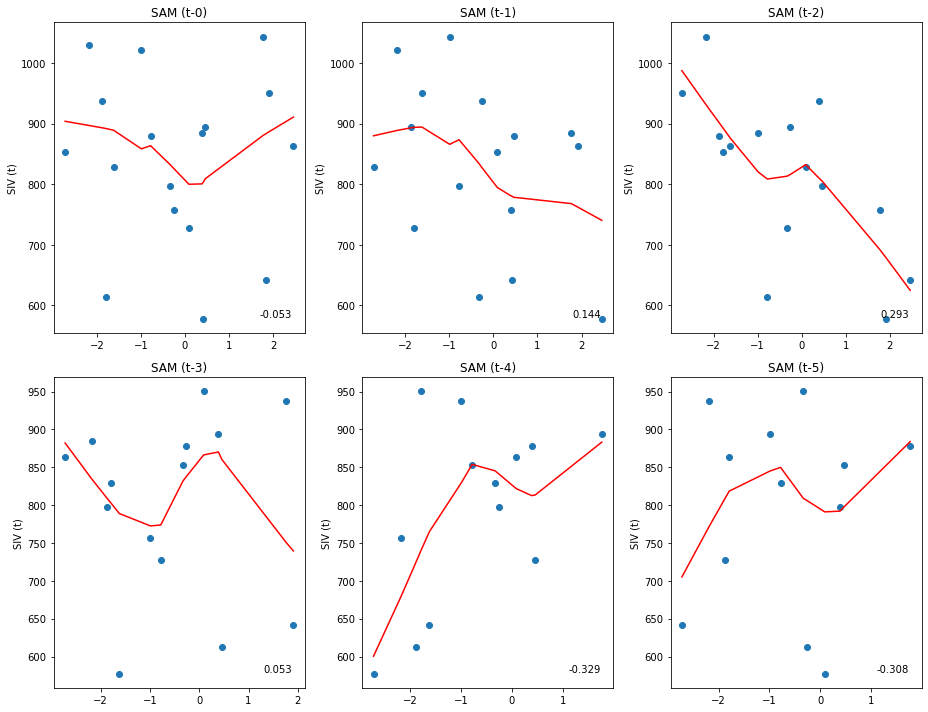

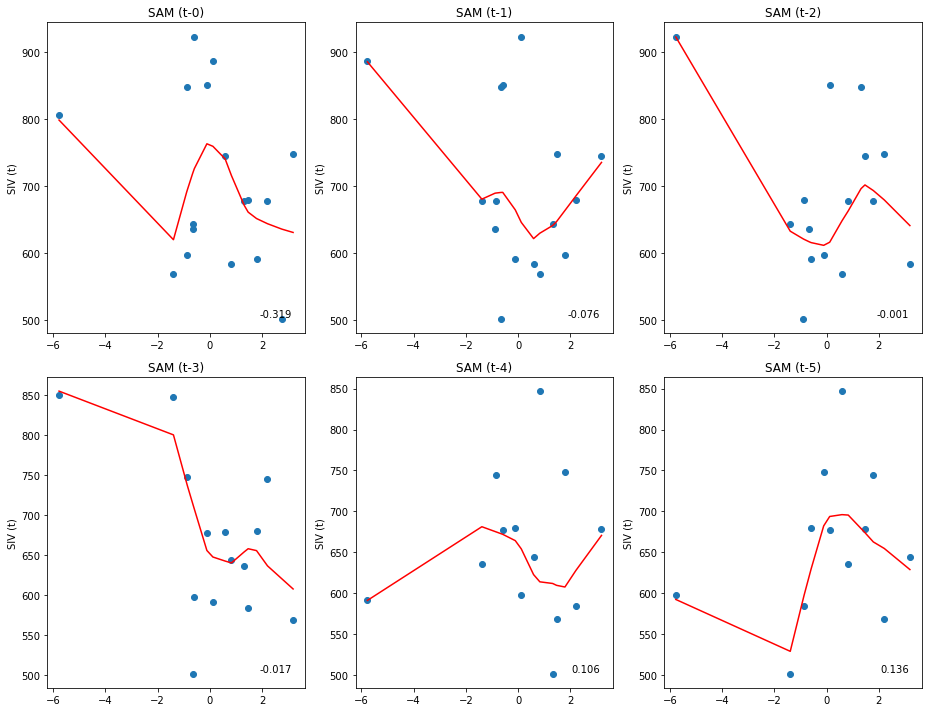

In [26]:
month_ccf_sam(df_new)

## SOI

In [7]:
#-----Read in SOI as dataframe
soi_df = pd.read_csv('/Users/fridaperez/Developer/repos/local_repo/AtmosIndex/SOI_index.csv')

In [8]:
# have to use pandas melt to go from wide to long data
soi_melt = pd.melt(soi_df, id_vars='Years')
soi_melt = soi_melt.rename(columns={"variable":"Month"})
soi_melt['Dates'] = pd.to_datetime(soi_melt[['Years', 'Month']].assign(DAY=1))

In [9]:
soi_melt = soi_melt.drop(["Years", "Month"], axis=1)
soi_melt['Dates'] = soi_melt['Dates'].astype('datetime64[ns]')

In [10]:
# Get dates  for only May -October
soi_melt = soi_melt[(soi_melt.Dates.dt.month >= 5) & (soi_melt.Dates.dt.month <= 10)]
# Here we set the index so that we can filter using iloc
soi_melt = soi_melt.set_index('Dates')
soi_melt = soi_melt.loc['2002-05-01':'2018-10-01']
# ## Removing the first 5 rows/dates
soi_melt  = soi_melt.iloc[5:]

In [11]:
# # we now want the 'Dates' as a normal column and not an index
soi_melt = soi_melt.reset_index()
soi_melt.rename(columns={'SOI': 'value'}, inplace=True)

# # Combining the SAM and SIV Dates
df_new_soi = soi_melt.copy()
df_new_soi["SIV"] = vol_df["SIV"]


In [12]:
df_new_soi.reset_index()

,index,Dates,value,SIV
0,0,2007-05-01,0.9,484.391924
1,1,2008-05-01,1.3,569.883316
2,2,2009-05-01,-0.3,578.503829
3,3,2010-05-01,-0.7,655.359084
4,4,2011-05-01,1.1,651.830940
...,...,...,...,...
92,92,2014-10-01,1.0,678.145248
93,93,2015-10-01,3.2,643.797937
94,94,2016-10-01,-0.2,846.980728
95,95,2017-10-01,-1.2,635.923255


In [13]:
df_new_soi.rename(columns = {'value':'SOI'}, inplace = True)

In [14]:
df_new_soi

,Dates,SOI,SIV
0,2007-05-01,0.9,484.391924
1,2008-05-01,1.3,569.883316
2,2009-05-01,-0.3,578.503829
3,2010-05-01,-0.7,655.359084
4,2011-05-01,1.1,651.830940
...,...,...,...
92,2014-10-01,1.0,678.145248
93,2015-10-01,3.2,643.797937
94,2016-10-01,-0.2,846.980728
95,2017-10-01,-1.2,635.923255


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import rpy2.robjects as robjects
import statsmodels.api as sm
from statsmodels.formula.api import ols

from astsadata import *


def month_ccf_soi(df):
    x = [5, 6, 7, 8, 9, 10]
    df_selmons = []
    df_vol_selmons = []
    df_soi_selmons = []
    cdfs = []
    for i in x:
        df_selmon = df[df['Dates'].dt.month.isin([i])]
        ccf_df = statsmodels.tsa.stattools.ccf(df_selmon.SOI, df_selmon.SIV, adjusted=False)
        ccf_df = pd.DataFrame(ccf_df, columns=['CCF'])
        df_selmons.append(df_selmon)
        print(ccf_df)
        cdfs.append(ccf_df)
        ## Separate the two columns
        # SIV #
        df_vol_selmon = df_selmon[['Dates', 'SIV']]
        df_vol_selmon['Dates'] = df_vol_selmon['Dates'].dt.to_period('M')
        df_vol_selmon = df_vol_selmon.set_index(['Dates'])
        df_vol_selmons.append(df_vol_selmon)
        # SOI #
        df_soi_selmon = df_selmon[['Dates', 'SOI']]
        df_soi_selmon['Dates'] = df_soi_selmon['Dates'].dt.to_period('M')
        df_soi_selmon = df_soi_selmon.set_index(['Dates'])
        df_soi_selmons.append(df_soi_selmon)
        #return cdfs
    # PLOT #
    for x in range(6):

        fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(13, 10))
        lag = 0
        for i in range(6):
            row = 0 if i <= 2 else 1
            col = i if i <= 2 else i - 3
            lowess = sm.nonparametric.lowess(df_vol_selmons[x].iloc[:, 0], df_soi_selmons[x].iloc[:, 0].shift(lag))
            axes[row, col].scatter(df_soi_selmons[x].shift(lag), df_vol_selmons[x])
            axes[row, col].set_title(f"SOI (t-{lag})")
            axes[row, col].set_ylabel("SIV (t)")
            axes[row, col].plot(lowess[:, 0], lowess[:, 1], color="red")
            axes[row, col].text(s=round(cdfs[x].loc[i][0], 3), x=.95, y=0.05, transform=axes[row, col].transAxes,
                                ha='right')  #ha, horizontal line
            lag += 1
        fig.tight_layout()
        plt.savefig(dir + str(x))


         CCF
0   0.234275
1  -0.078925
2  -0.120034
3   0.378936
4   0.041928
5  -0.027664
6   0.015508
7  -0.023756
8  -0.178221
9   0.070914
10 -0.055174
11 -0.103654
         CCF
0   0.076075
1   0.130264
2  -0.210122
3  -0.121571
4  -0.222180
5   0.410205
6   0.092339
7  -0.049584
8  -0.012872
9  -0.132424
10 -0.122534
11  0.165623
12  0.103097
13 -0.001943
14  0.057168
15 -0.062530
16 -0.075800
         CCF
0  -0.141347
1   0.240007
2   0.287242
3   0.152185
4  -0.119475
5  -0.298348
6  -0.386072
7   0.146622
8   0.117865
9   0.242004
10  0.200743
11 -0.118502
12 -0.266201
13  0.010441
14  0.032934
15  0.098235
16  0.000081
         CCF
0   0.107838
1  -0.332040
2  -0.328343
3  -0.033877
4  -0.130901
5   0.115764
6   0.385265
7   0.098031
8  -0.072503
9  -0.211000
10 -0.165490
11  0.023891
12  0.044457
13  0.038211
14  0.092261
15  0.034477
16  0.017401
         CCF
0   0.074901
1  -0.039230
2   0.142156
3  -0.227217
4  -0.113694
5  -0.160064
6  -0.233337
7  -0.099271
8  -0.104511

/var/folders/f1/8zx2wbhx4vb8626x_99mwyx40000gn/T/ipykernel_95455/2618631878.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vol_selmon['Dates'] = df_vol_selmon['Dates'].dt.to_period('M')
/var/folders/f1/8zx2wbhx4vb8626x_99mwyx40000gn/T/ipykernel_95455/2618631878.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_soi_selmon['Dates'] = df_soi_selmon['Dates'].dt.to_period('M')
/var/folders/f1/8zx2wbhx4vb8626x_99mwyx40000gn/T/ipykernel_95455/2618631878.py:27: SettingWithCopyWarning: 
A value is try

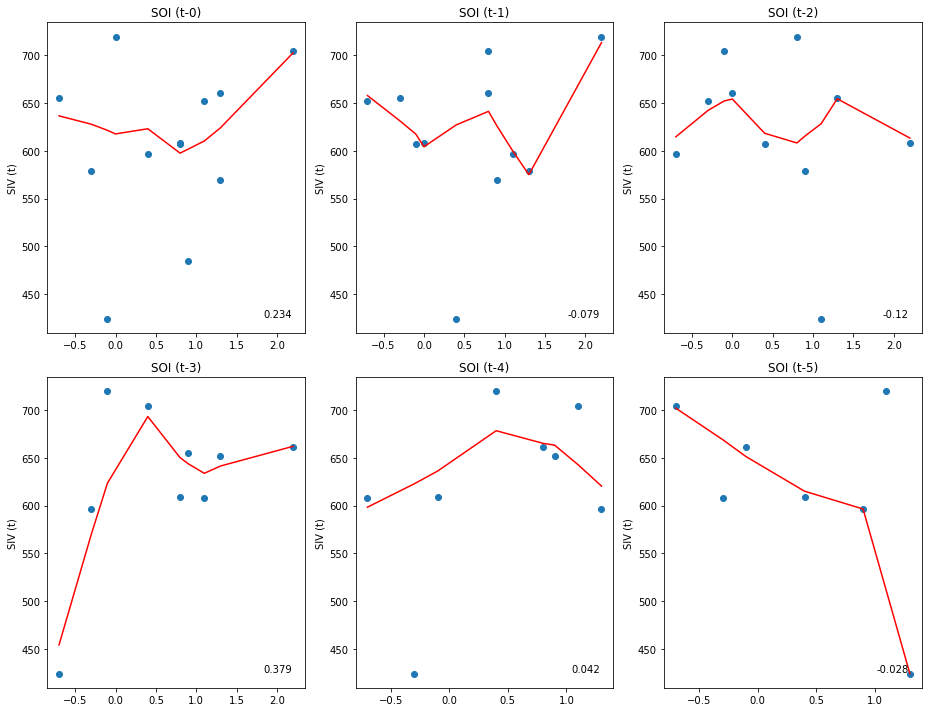

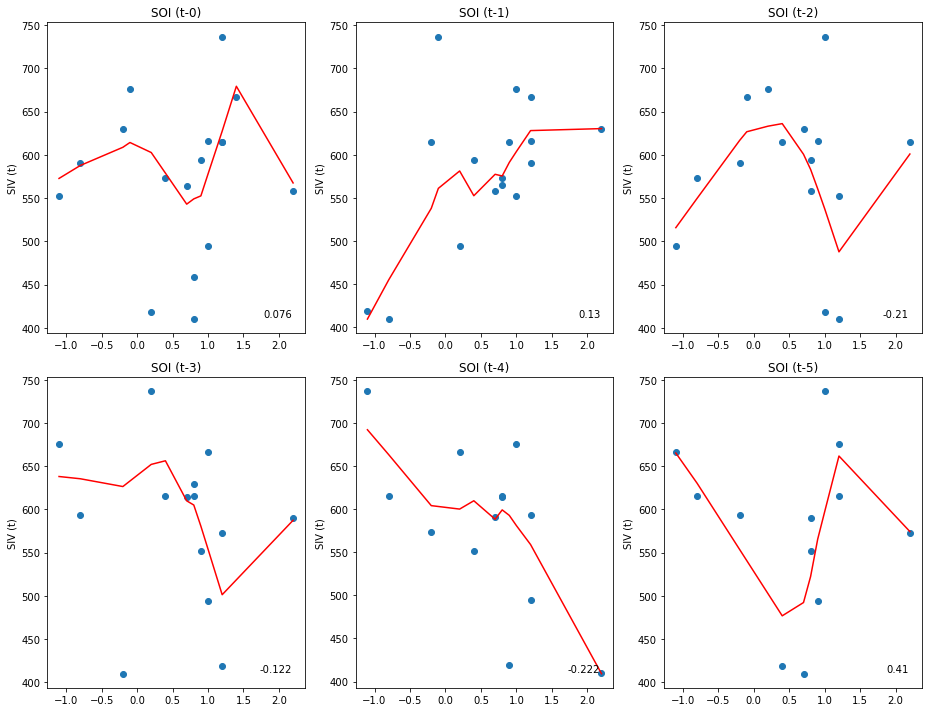

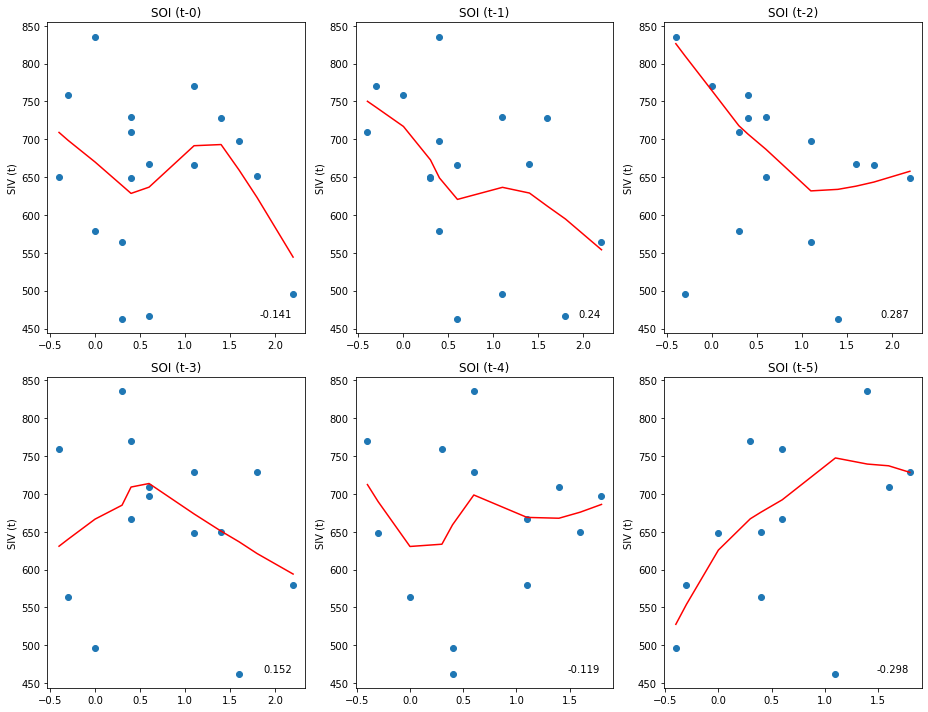

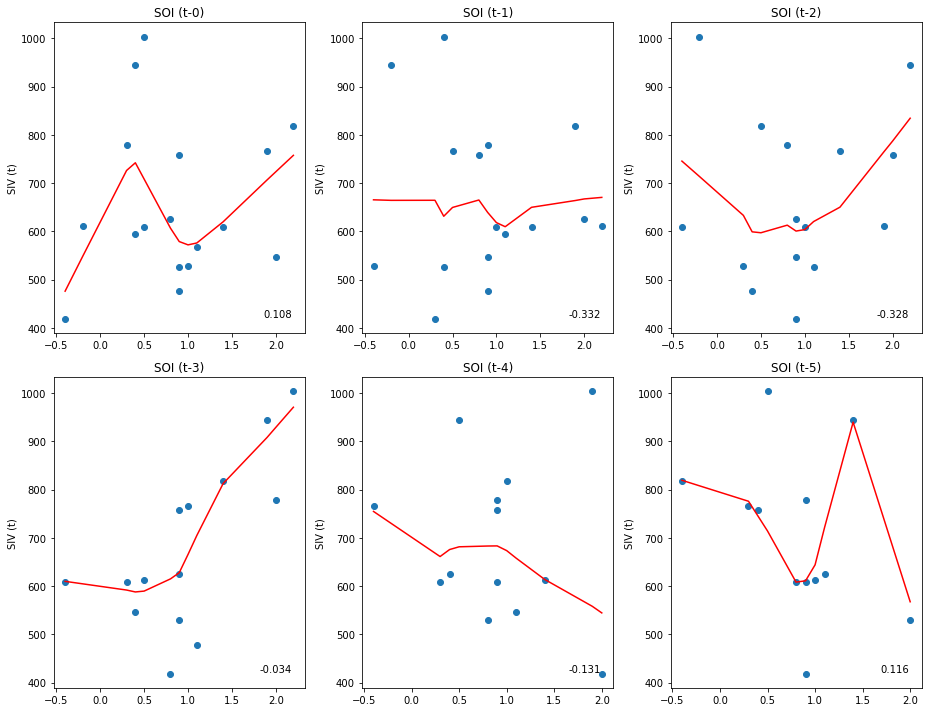

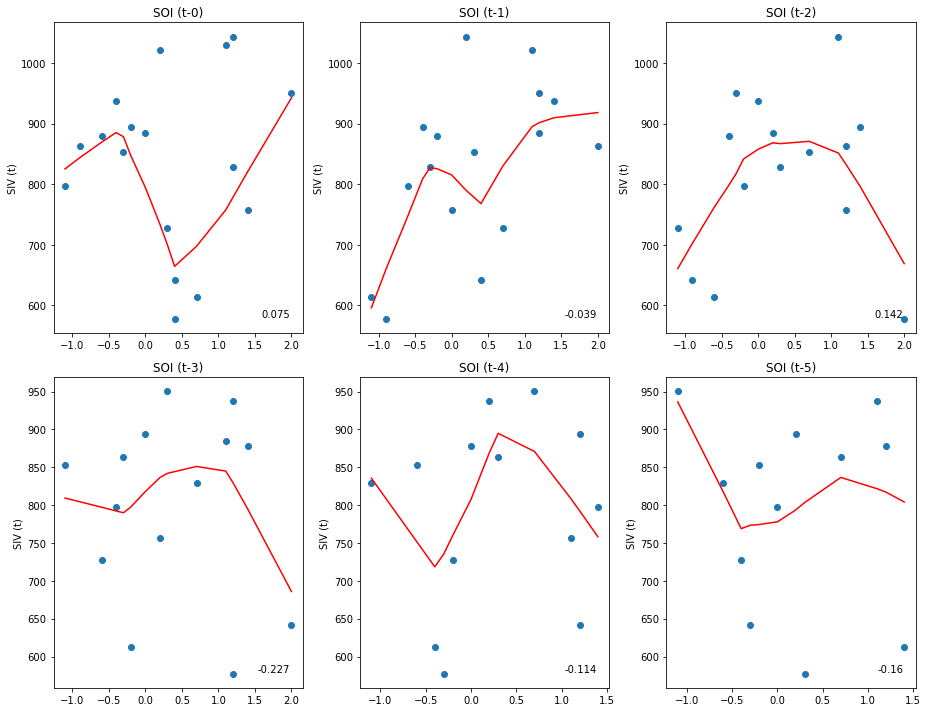

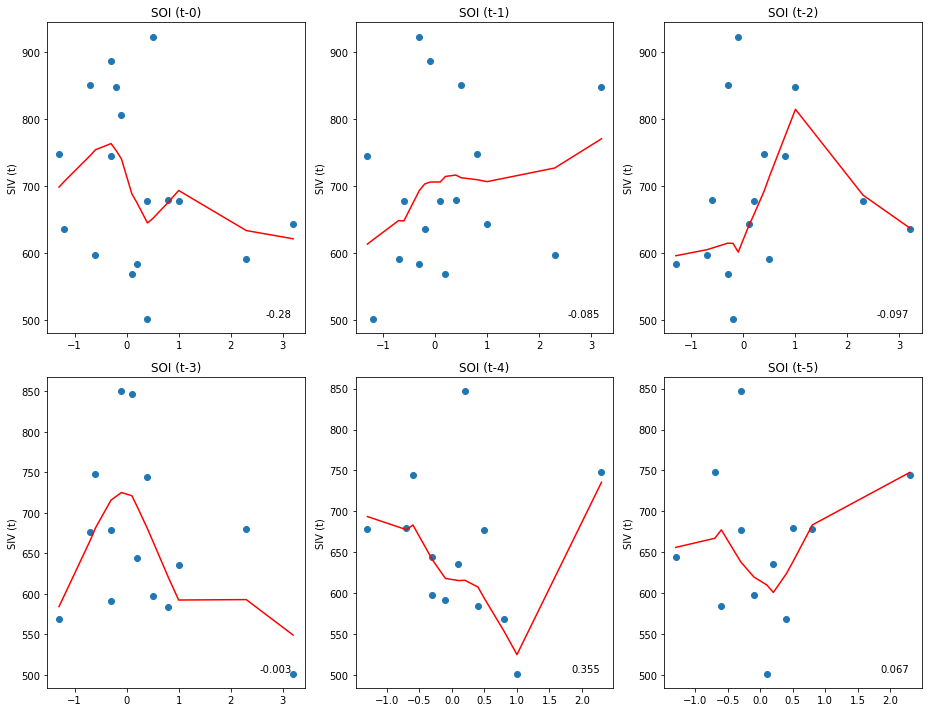

In [17]:
month_ccf_soi(df_new_soi)

## ASL

In [18]:
#-----Read in ASL as dataframe
asl_df = pd.read_csv('/Users/fridaperez/Developer/repos/local_repo/AtmosIndex/ASL_index.csv')

In [19]:
asl_df = asl_df.drop(["Lon", "Lat","SectorPres", "RelCenPres"], axis=1)
asl_df['Dates'] = asl_df['Dates'].astype('datetime64[ns]')
#print(asl_df)

In [20]:
# Get dates  for only May -October
asl_df = asl_df[(asl_df.Dates.dt.month >= 5) & (asl_df.Dates.dt.month <= 10)]
# Here we set the index so that we can filter using iloc
asl_df = asl_df.set_index('Dates')
asl_df = asl_df.loc['2002-05-01':'2018-10-01']
# ## Removing the first 5 rows/dates
#asl_df  = asl_df.iloc[5:]
print(asl_df)

            ActCenPres
Dates                 
2002-10-01  986.911499
2003-05-01  967.435608
2003-06-01  985.111511
2003-07-01  969.911377
2003-08-01  972.973511
...                ...
2018-06-01  972.353699
2018-07-01  977.746094
2018-08-01  978.081421
2018-09-01  970.656189
2018-10-01  965.293152

[97 rows x 1 columns]


In [21]:
# # we now want the 'Dates' as a normal column and not an index
asl_df = asl_df.reset_index()
print(asl_df)

        Dates  ActCenPres
0  2002-10-01  986.911499
1  2003-05-01  967.435608
2  2003-06-01  985.111511
3  2003-07-01  969.911377
4  2003-08-01  972.973511
..        ...         ...
92 2018-06-01  972.353699
93 2018-07-01  977.746094
94 2018-08-01  978.081421
95 2018-09-01  970.656189
96 2018-10-01  965.293152

[97 rows x 2 columns]


In [22]:
# # Combining the SAM and SIV Dates
df_new_asl = asl_df.copy()
df_new_asl["SIV"] = vol_df["SIV"]
print(df_new_asl)

        Dates  ActCenPres         SIV
0  2002-10-01  986.911499  484.391924
1  2003-05-01  967.435608  569.883316
2  2003-06-01  985.111511  578.503829
3  2003-07-01  969.911377  655.359084
4  2003-08-01  972.973511  651.830940
..        ...         ...         ...
92 2018-06-01  972.353699  678.145248
93 2018-07-01  977.746094  643.797937
94 2018-08-01  978.081421  846.980728
95 2018-09-01  970.656189  635.923255
96 2018-10-01  965.293152  501.360610

[97 rows x 3 columns]


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import rpy2.robjects as robjects
import statsmodels.api as sm
from statsmodels.formula.api import ols

from astsadata import *

dir = '/Users/fridaperez/Developer/repos/local_repo/pub_plots/EastAntarctica/'
def month_ccf_asl(df):
    x = [5, 6, 7, 8, 9, 10]
    df_selmons = []
    df_vol_selmons = []
    df_asl_selmons = []
    cdfs = []
    for i in x:
        df_selmon = df[df['Dates'].dt.month.isin([i])]
        ccf_df = statsmodels.tsa.stattools.ccf(df_selmon.ActCenPres, df_selmon.SIV, adjusted=False)
        ccf_df = pd.DataFrame(ccf_df, columns=['CCF'])
        df_selmons.append(df_selmon)
        print(ccf_df)
        cdfs.append(ccf_df)
        ## Separate the two columns
        # SIV #
        df_vol_selmon = df_selmon[['Dates', 'SIV']]
        df_vol_selmon['Dates'] = df_vol_selmon['Dates'].dt.to_period('M')
        df_vol_selmon = df_vol_selmon.set_index(['Dates'])
        df_vol_selmons.append(df_vol_selmon)
        # SOI #
        df_asl_selmon = df_selmon[['Dates', 'ActCenPres']]
        df_asl_selmon['Dates'] = df_asl_selmon['Dates'].dt.to_period('M')
        df_asl_selmon = df_asl_selmon.set_index(['Dates'])
        df_asl_selmons.append(df_asl_selmon)
        #return cdfs
    # PLOT #
    for x in range(6):

        fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(13, 10))
        lag = 0
        for i in range(6):
            row = 0 if i <= 2 else 1
            col = i if i <= 2 else i - 3
            lowess = sm.nonparametric.lowess(df_vol_selmons[x].iloc[:, 0], df_asl_selmons[x].iloc[:, 0].shift(lag))
            axes[row, col].scatter(df_asl_selmons[x].shift(lag), df_vol_selmons[x])
            axes[row, col].set_title(f"ASL (t-{lag})")
            axes[row, col].set_ylabel("SIV (t)")
            axes[row, col].plot(lowess[:, 0], lowess[:, 1], color="red")
            axes[row, col].text(s=round(cdfs[x].loc[i][0], 3), x=.95, y=0.05, transform=axes[row, col].transAxes,
                                ha='right')  #ha, horizontal line
            lag += 1
        fig.tight_layout()
        plt.savefig(dir + str(x))

         CCF
0   0.162892
1   0.113650
2   0.112591
3  -0.155913
4  -0.376897
5   0.134319
6   0.221101
7   0.057113
8  -0.137137
9  -0.118782
10  0.107374
11 -0.027158
12 -0.006115
13 -0.012604
14  0.050271
15 -0.018887
         CCF
0  -0.433492
1  -0.056392
2  -0.259224
3  -0.151739
4  -0.012192
5   0.060156
6  -0.093574
7   0.221815
8   0.016287
9   0.069215
10  0.103132
11  0.102274
12  0.035367
13  0.142270
14 -0.022165
15  0.056513
         CCF
0   0.373971
1  -0.140352
2   0.030499
3   0.120696
4  -0.099956
5   0.108022
6  -0.133498
7   0.203888
8  -0.033298
9   0.078039
10 -0.033948
11 -0.065005
12  0.006771
13 -0.056259
14  0.000059
15 -0.007259
         CCF
0   0.228885
1  -0.381687
2  -0.147891
3  -0.182939
4   0.017164
5   0.080025
6  -0.015411
7   0.209186
8   0.040616
9   0.078394
10  0.070280
11  0.114377
12 -0.002963
13 -0.012183
14  0.007888
15 -0.027850
         CCF
0   0.091799
1  -0.224953
2   0.177154
3  -0.422509
4  -0.214271
5  -0.222756
6  -0.094934
7  -0.138664

/var/folders/f1/8zx2wbhx4vb8626x_99mwyx40000gn/T/ipykernel_95455/3915482838.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vol_selmon['Dates'] = df_vol_selmon['Dates'].dt.to_period('M')
/var/folders/f1/8zx2wbhx4vb8626x_99mwyx40000gn/T/ipykernel_95455/3915482838.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_asl_selmon['Dates'] = df_asl_selmon['Dates'].dt.to_period('M')
/var/folders/f1/8zx2wbhx4vb8626x_99mwyx40000gn/T/ipykernel_95455/3915482838.py:27: SettingWithCopyWarning: 
A value is try

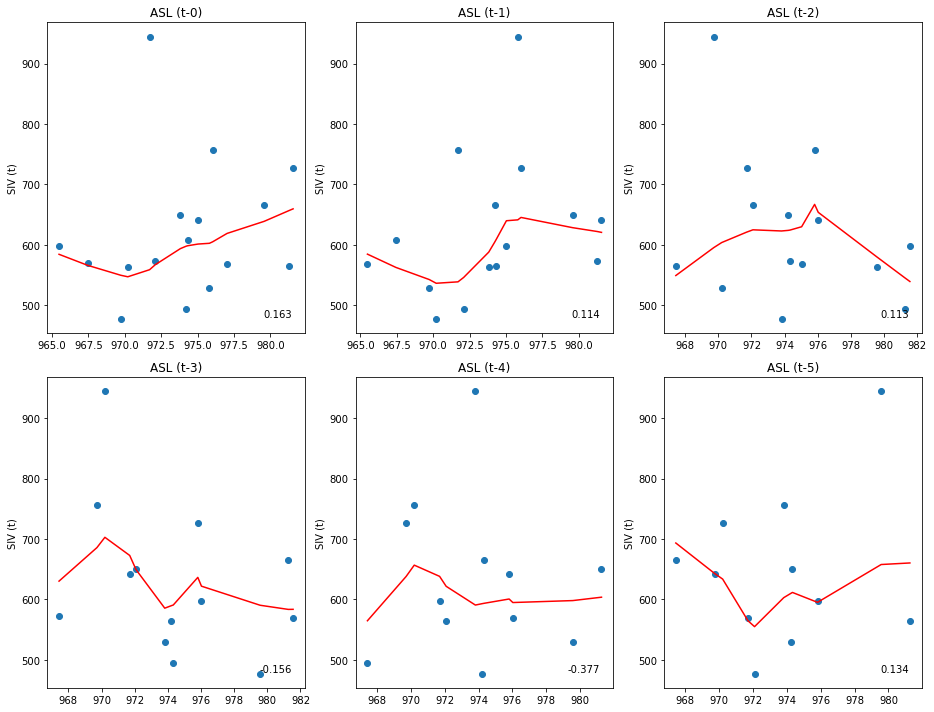

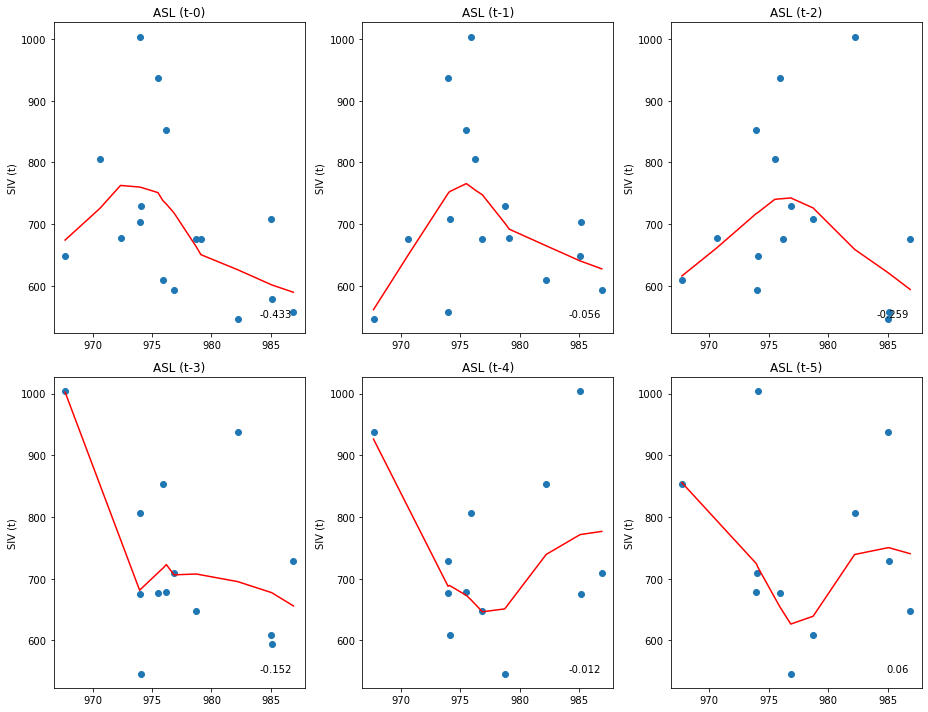

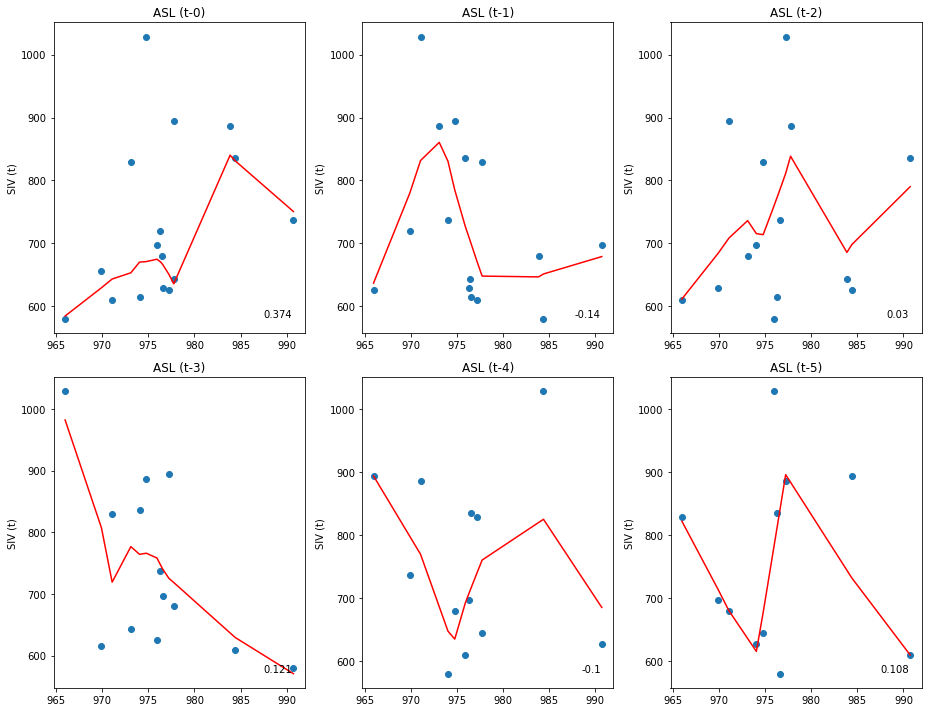

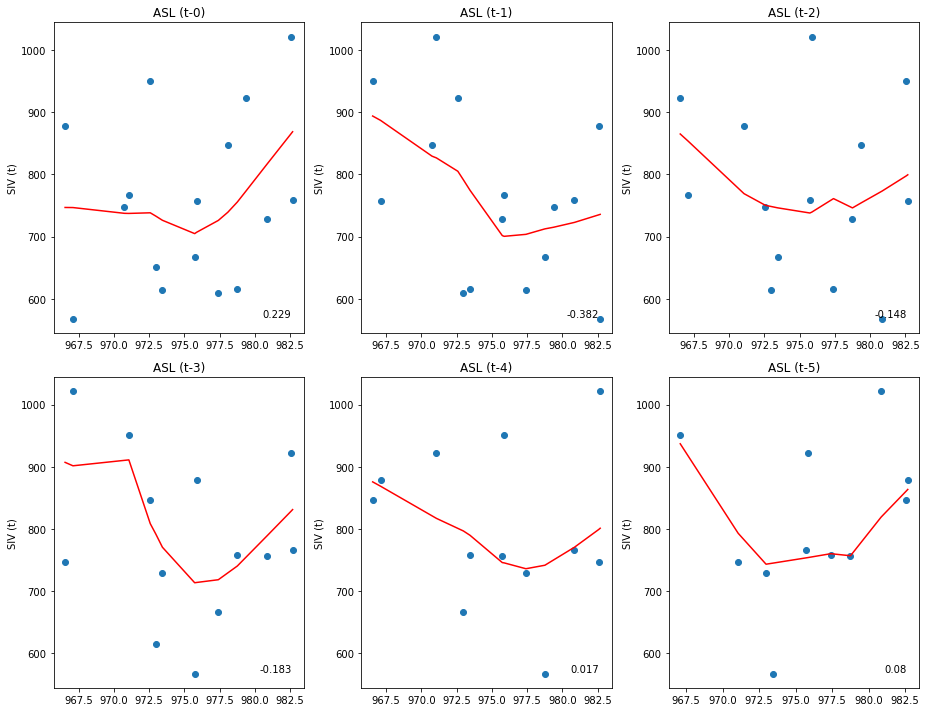

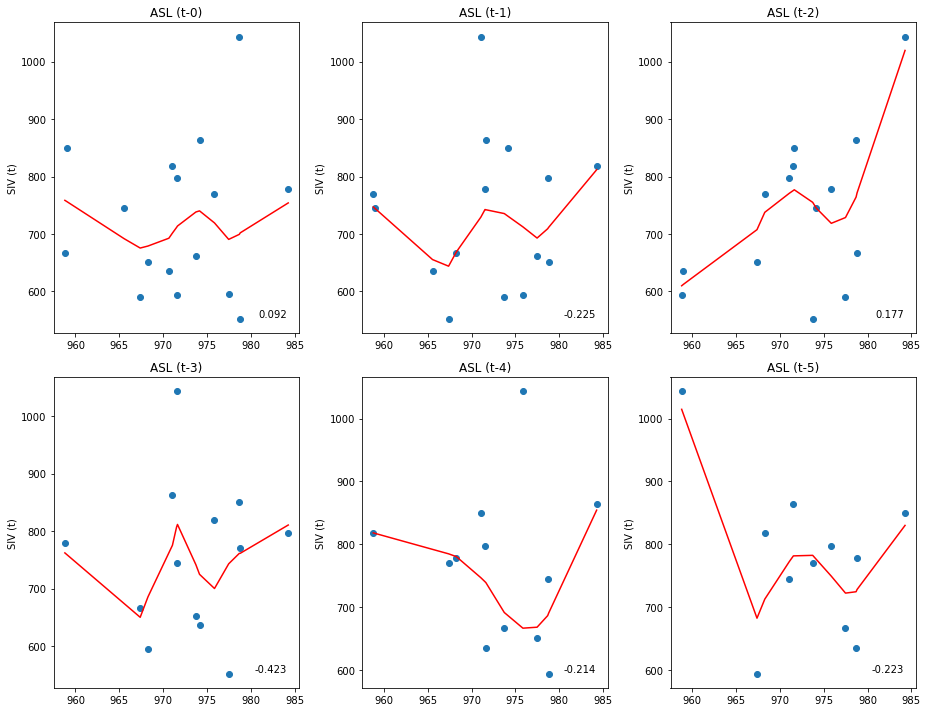

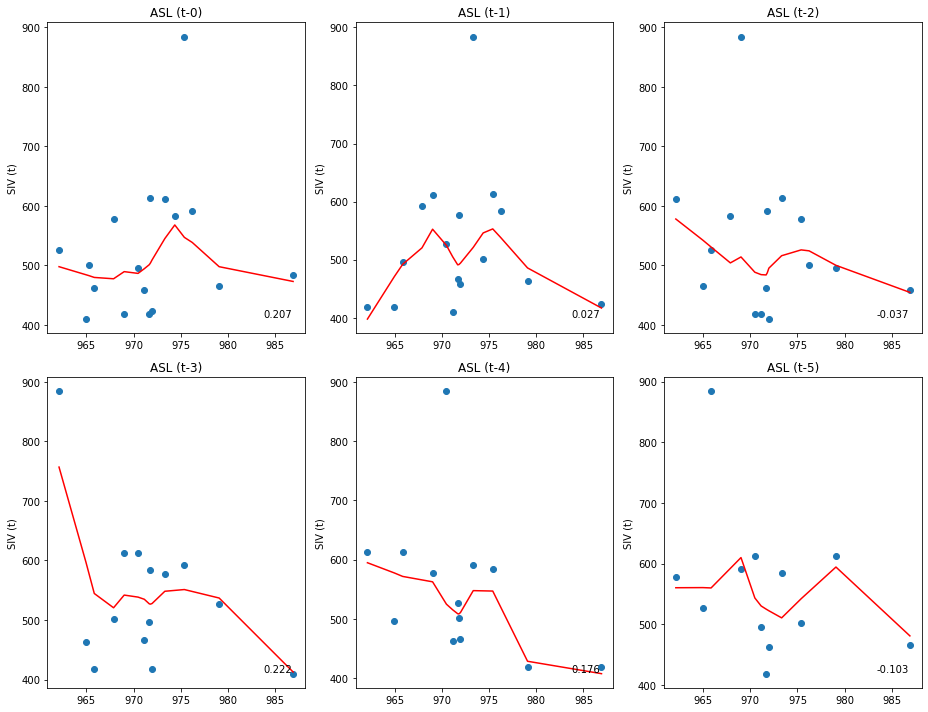

In [24]:
month_ccf_asl(df_new_asl)